## Defining the Question

1. The goal of this analysis is to determing the factors that affect house prices. The dataset from Hass Consultanting Company will be used to model functions for determing house pricess based on a set of independent variables.

2. The goal is to use five regression models namely multiple regression, quantile regression, ridge regression, lasso regression and Elastic net regression to create five different models. The models with the best results will be choosen.

3. The metric for success is the accuracy level of the model. The goal is to achieve at least 75% accuracy.

## 1.  Loading the Dataset

In [0]:
# Importing our libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

In [0]:
# Loading our dataset into a dataframe

house_df = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')


## 2. Checking the Data 

In [3]:
# Checking the top of the datast

house_df.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [4]:
# Checking the bottom of the dataset

house_df.tail()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[5 rows x 20 columns]

In [5]:
# Checking the shape of our dataset

house_df.shape

(21613, 20)

In [6]:
# Checking the information of our dataset

house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [7]:
# Displaying the columns in our dataset

house_df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 3. Data Cleaning

In [8]:
# Checking for null values in each column in our dataset

house_df.isnull().sum()

# The results show that the dataset does not have any null values so no action will be taken

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
# Checking if the dataset has any duplicated values

house_df.duplicated().any()

# Results show that there are some duplicated entries in our rows


True

In [0]:
# Droping duplicated values

house_df = house_df.drop_duplicates()

In [15]:
# We need to rename our columns so that they look more presentatable 



house_df.rename({'id':'ID', 'price':'Price', 'bedrooms':'Bedrooms', 'bathrooms':'Bathrooms', 'sqft_living':'Sqft_Living',
                 'sqft_lot':'Sqft_Lot', 'floors':'Floors', 'waterfront':'Waterfront', 'view':'View', 'condition':'Condition',
                 'grade':'Grade', 'sqft_above':'Sqft_Above', 'sqft_basement':'Sqft_Basement', 'yr_built':'Year_Built', 'yr_renovated':'Year_Renovated',
                 'zipcode':'Zipcode', 'lat':'Latitude', 'long':'Longitude', 'sqft_living15':'Sqft_Living15', 'sqft_lot15':'Sqft_Lot15'}, axis=1, inplace=True)
house_df.head()

ID     Price  Bedrooms  ...  Longitude  Sqft_Living15  Sqft_Lot15
0  7129300520  221900.0         3  ...   -122.257           1340        5650
1  6414100192  538000.0         3  ...   -122.319           1690        7639
2  5631500400  180000.0         2  ...   -122.233           2720        8062
3  2487200875  604000.0         4  ...   -122.393           1360        5000
4  1954400510  510000.0         3  ...   -122.045           1800        7503

[5 rows x 20 columns]

In [0]:
# We need to drop the columns that we will not be using in our regression 



### Checking for Outliers

In [23]:
house_df.columns

Index(['ID', 'Price', 'Bedrooms', 'Bathrooms', 'Sqft_Living', 'Sqft_Lot',
       'Floors', 'Waterfront', 'View', 'Condition', 'Grade', 'Sqft_Above',
       'Sqft_Basement', 'Year_Built', 'Year_Renovated', 'Zipcode', 'Latitude',
       'Longitude', 'Sqft_Living15', 'Sqft_Lot15'],
      dtype='object')

Outliers for Housing Data.


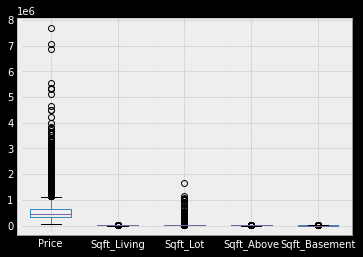

In [24]:
# We need to check for outliars in out data so that we know what we are dealing with
# Having alot of outliers could affect the results of our models

plt.style.use('bmh')


house_outlier_check = house_df[['Price','Sqft_Living', 'Sqft_Lot','Sqft_Above','Sqft_Basement']]

_t, df_outliers = pd.DataFrame.boxplot(house_outlier_check, return_type="both", widths=0.6)

outliers = [flier.get_ydata() for flier in df_outliers["fliers"]]



print("Outliers for Housing Data.")

plt.show()

In [0]:
# Creating a functions that helps us count number of outliers in the columns
# We also want to check the percentages of outliers in these comuns

def detect_outlier(data):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [26]:
# Looping through each column to check the percentage of outliers in the data


for col in house_outlier_check:
    rows, columns = house_outlier_check.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(house_outlier_check[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

Price has 406 outliers in total, which is 1.9% of data
Sqft_Living has 248 outliers in total, which is 1.1% of data
Sqft_Lot has 347 outliers in total, which is 1.6% of data
Sqft_Above has 254 outliers in total, which is 1.2% of data
Sqft_Basement has 247 outliers in total, which is 1.1% of data


> From the computation done above, outliers are only a small portion of our entire dataset. The decisions made is not to drop these outliers because they may be important in getting a model that reflects the accurate situation in the housing market.

In [34]:
# Finally we need to check and deal with anomalies in the data

print(house_df['Year_Renovated'].unique())

print("\n")

print(house_df['Bathrooms'].dtype)

print(house_df['Floors'].dtype)


[   0 1991 2002 2010 1999 1992 2013 1994 1978 2005 2008 2003 1984 1954
 2014 2011 1974 1983 1945 1990 1988 1957 1977 1981 1995 2000 1998 1970
 1989 2004 1986 2009 2007 1987 1973 2006 1985 2001 1980 1971 1979 1997
 1950 1969 1948 2015 1968 2012 1963 1951 1993 1962 1996 1972 1953 1955
 1982 1956 1940 1976 1946 1975 1958 1964 1959 1960 1967 1965 1934 1944]


float64
float64


>* The year renovated colum has zero values which mean that no renovation was done.
While this may seem like an anomaly, having a zero means that no renovation has been done on the house. we can deal with this when doing feature enginering.
 >* Bathtooms and flors are floats which does not make sense. In real estate, it is possible to have a [half-bathroom](https://www.trelora.com/blog/2018/08/what-is-a-half-bath/) and floor space can be represented in fractions.

## 4. Exploratory Data Analysis

In [0]:
house_df.drop('ID', axis=1, inplace=True)

In [0]:
house_df.drop(['Sqft_Living15', 'Sqft_Lot15'], axis=1, inplace=True)

In [64]:
house_df.columns

Index(['Price', 'Bedrooms', 'Bathrooms', 'Sqft_Living', 'Sqft_Lot', 'Floors',
       'Waterfront', 'View', 'Condition', 'Grade', 'Sqft_Above',
       'Sqft_Basement', 'Year_Built', 'Year_Renovated', 'Zipcode', 'Latitude',
       'Longitude'],
      dtype='object')

In [65]:
house_df.describe()

Price      Bedrooms  ...      Latitude     Longitude
count  2.161000e+04  21610.000000  ...  21610.000000  21610.000000
mean   5.401789e+05      3.370847  ...     47.560049   -122.213910
std    3.673876e+05      0.930110  ...      0.138572      0.140833
min    7.500000e+04      0.000000  ...     47.155900   -122.519000
25%    3.216125e+05      3.000000  ...     47.470925   -122.328000
50%    4.500000e+05      3.000000  ...     47.571800   -122.231000
75%    6.450000e+05      4.000000  ...     47.678000   -122.125000
max    7.700000e+06     33.000000  ...     47.777600   -121.315000

[8 rows x 17 columns]

### I. Univariate Analysis

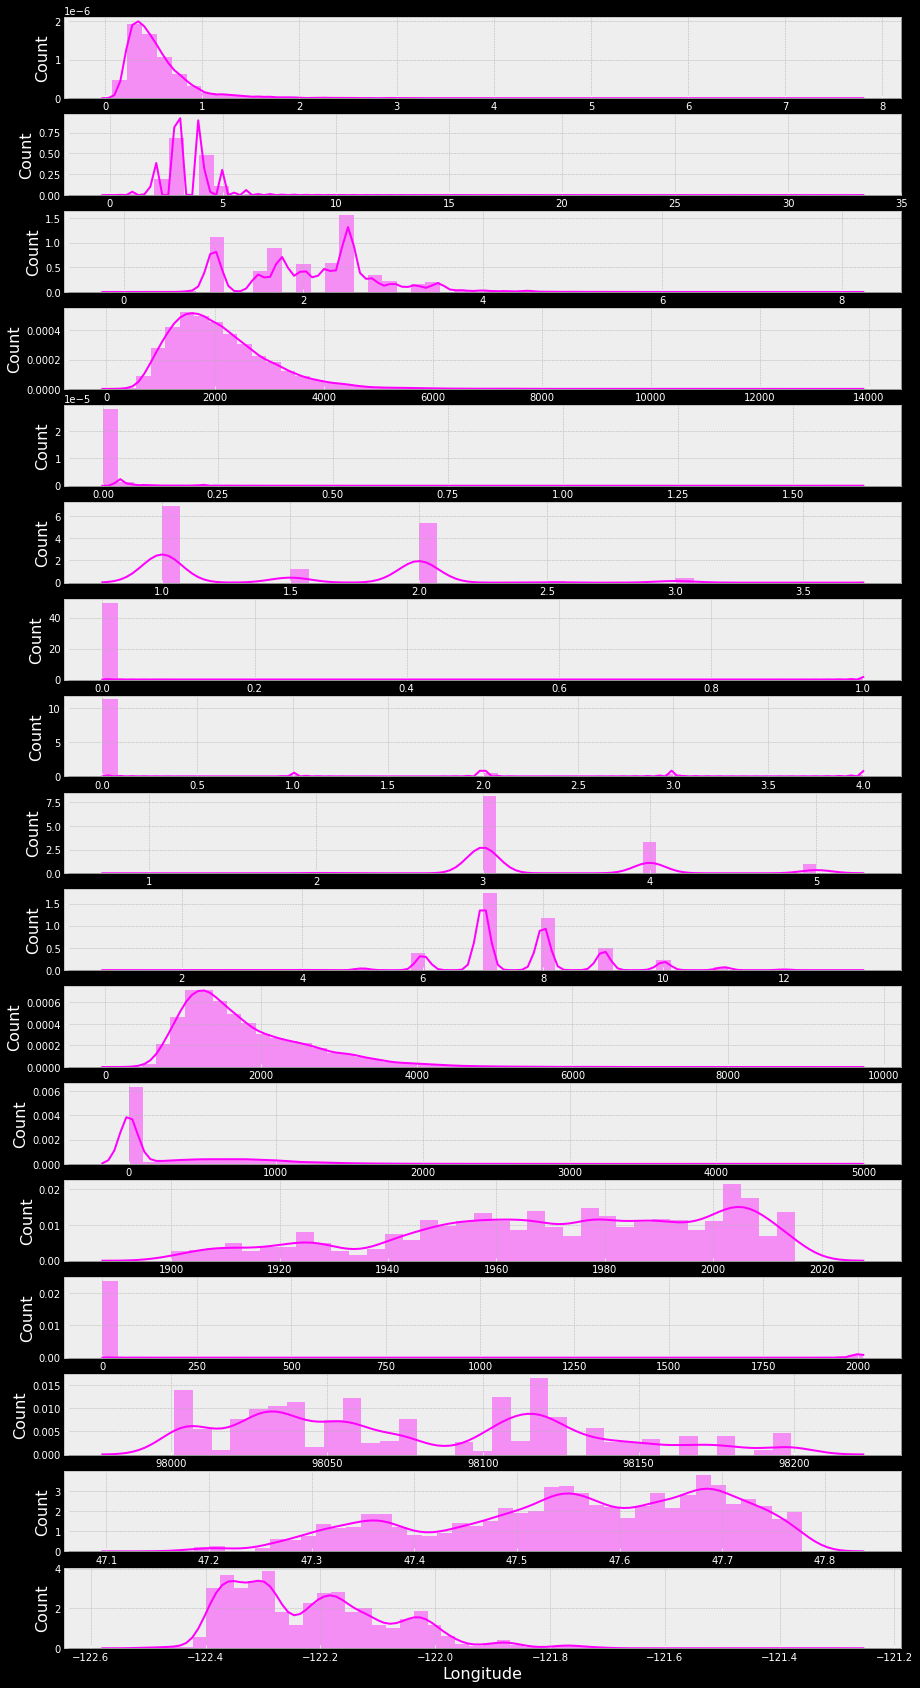

In [70]:
# Since our variables are all numerical, we are going to get the frequency distribution first

plt.style.use('bmh')

fig, ax = plt.subplots(len(house_df.columns), figsize=(15,30))

for i, col_val in enumerate(house_df):
  sns.distplot(house_df[col_val], hist=True, ax=ax[i], color='magenta')
  ax[i].set_xlabel(col_val, fontsize=16)
  ax[i].set_ylabel('Count', fontsize=16)

plt.show()

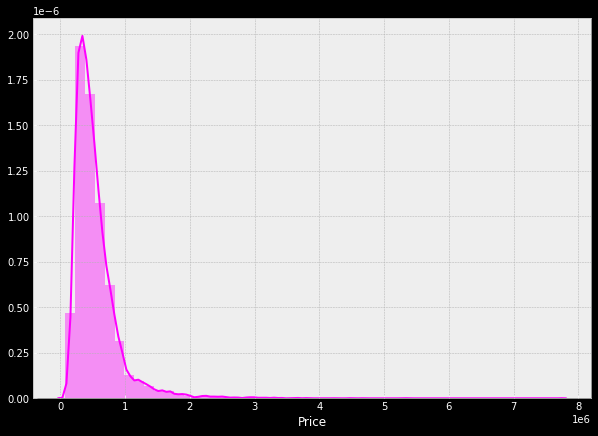

In [69]:
# Checking distribution of price alone

plt.figure(figsize=(10,7))
sns.distplot(house_df.Price, color='magenta')
plt.show()

In [53]:
# Checking for mean, mode, median and kurtosis

print("Mean Price: " + str(house_df.Price.mean())+"\n")

print("Mode Price: " + str(house_df.Price.mode())+"\n")

print("Median Price: " + str(house_df.Price.median())+"\n")

print("Kurtosis of Price: " + str(house_df.Price.kurt())+"\n")

Mean Price: 540178.9448403517

Mode Price: 0    350000.0
1    450000.0
dtype: float64

Median Price: 450000.0

Kurtosis of Price: 34.517437729615054



### II. Bivariate Analysis

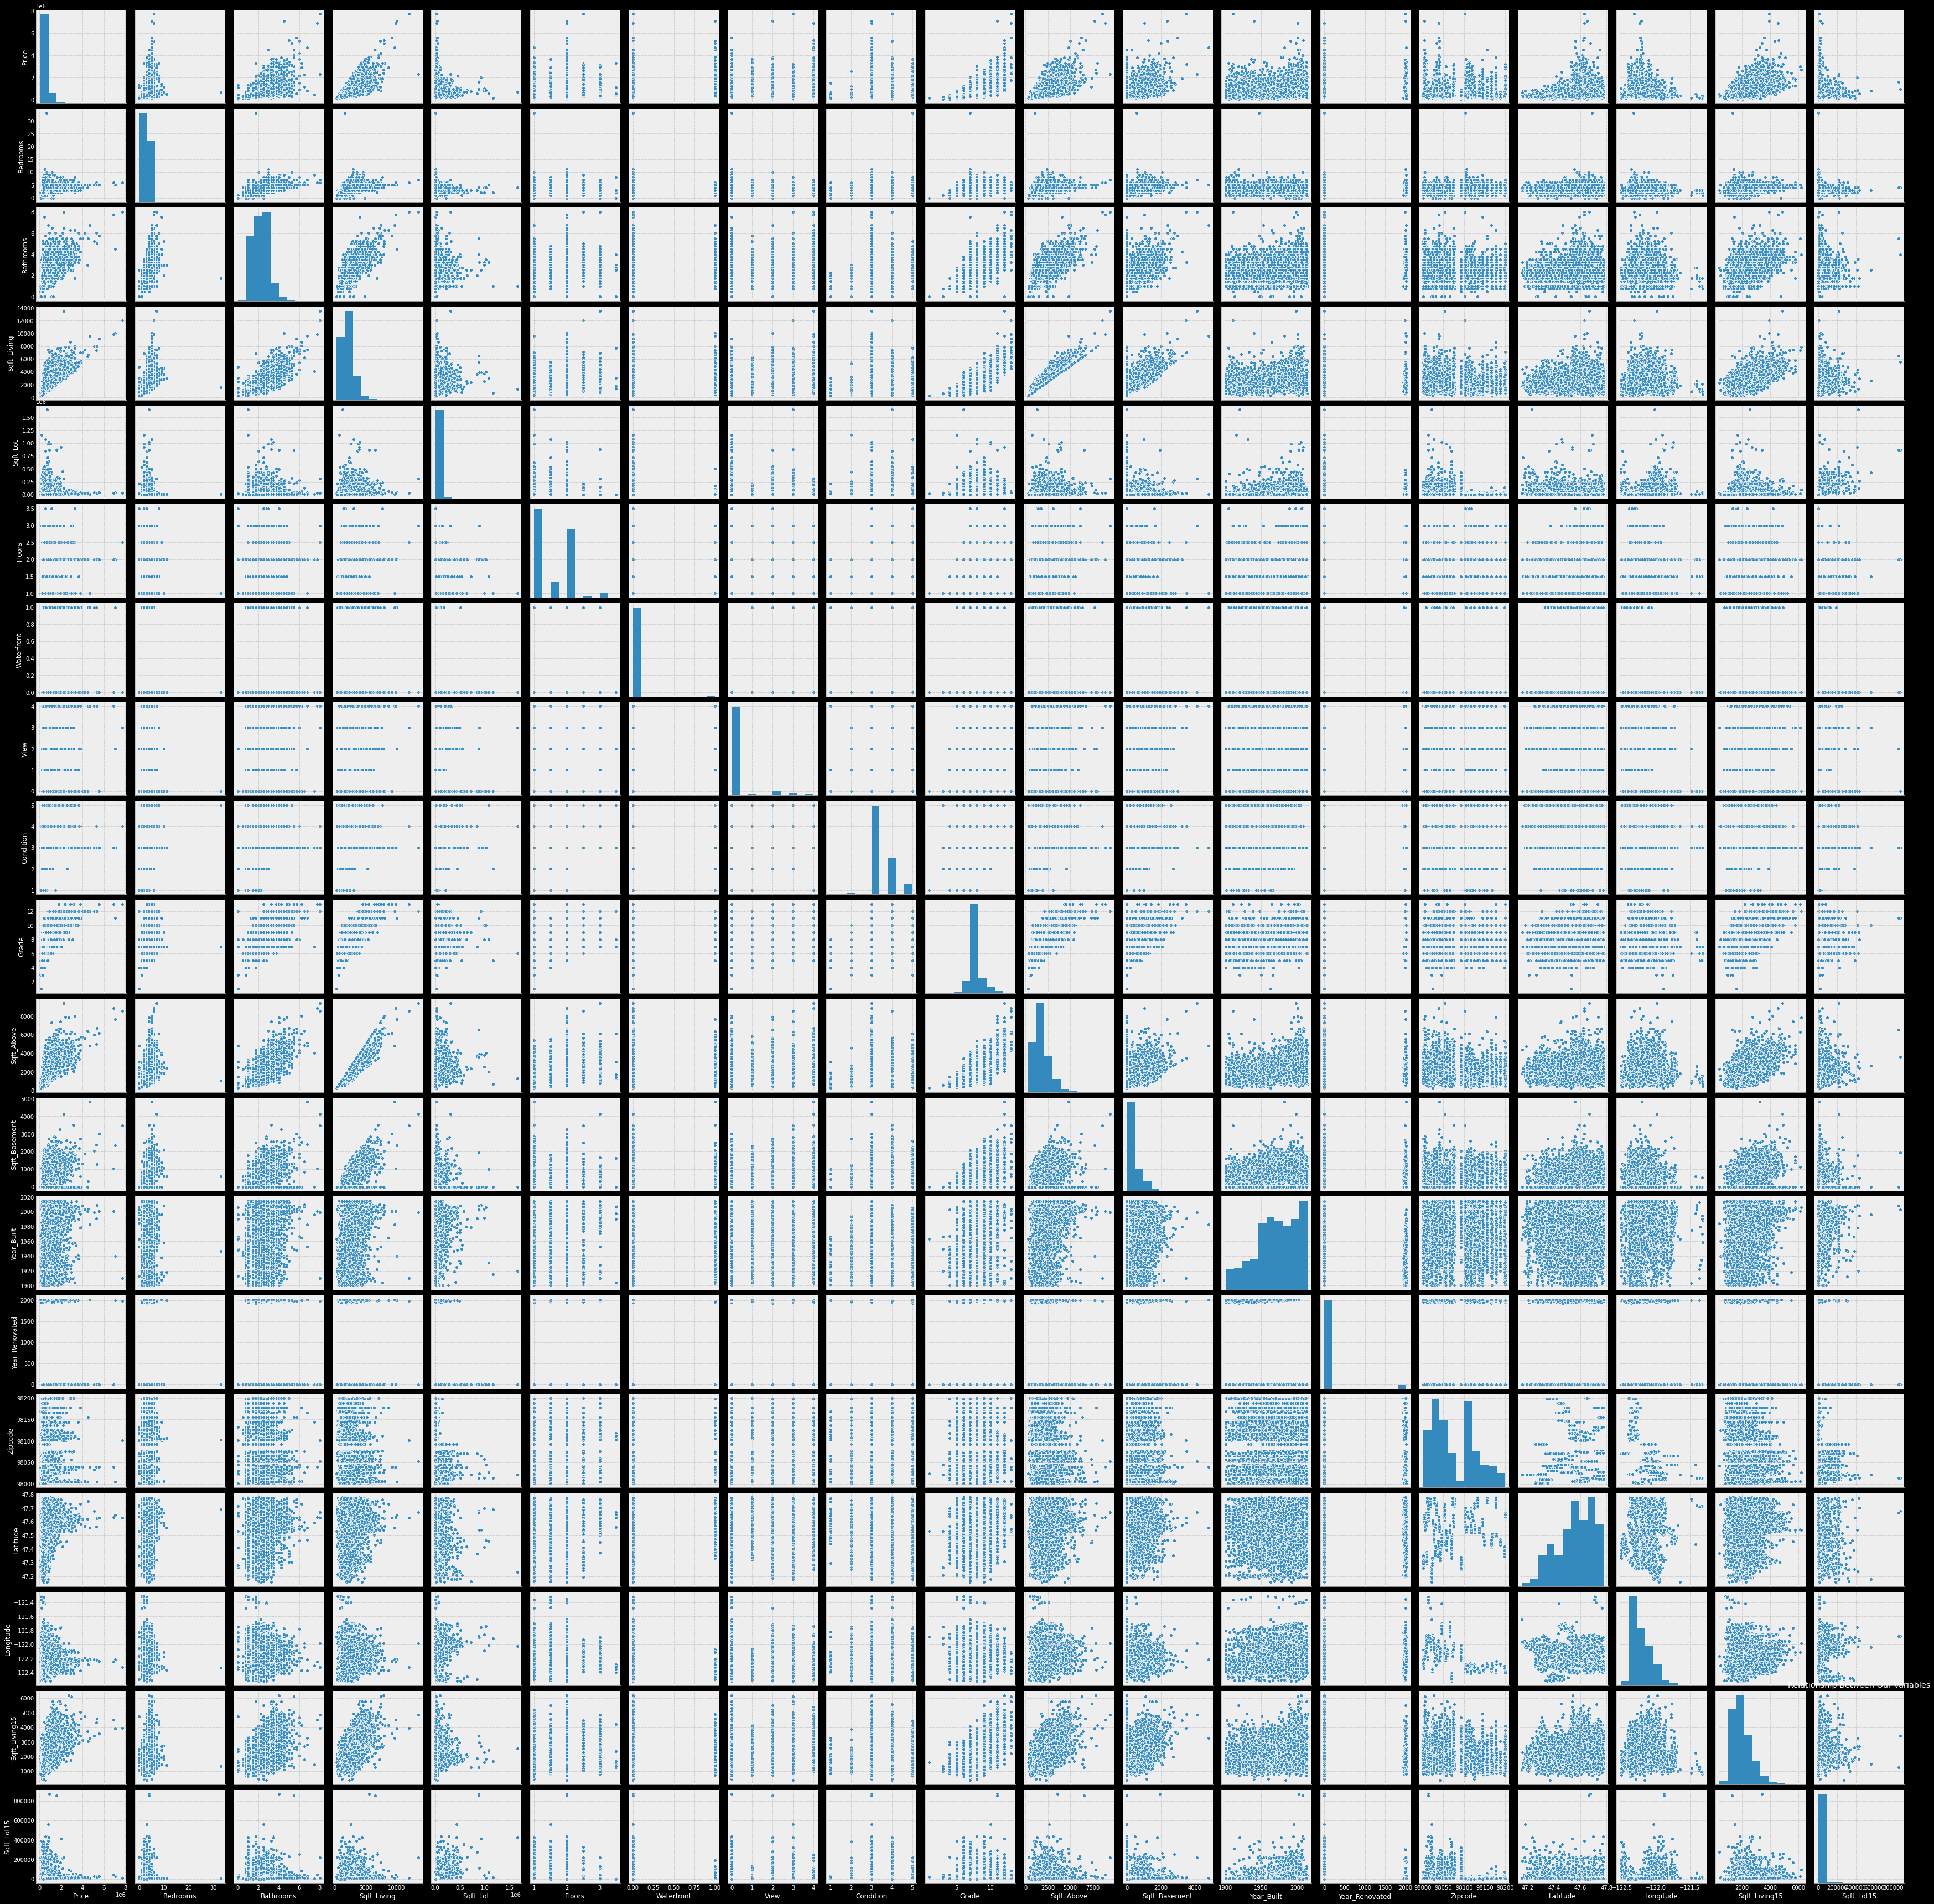

In [54]:

# Getting scatter plot from our variables

plt.style.use('dark_background')
plt.style.use('bmh')

sns.pairplot(house_df)

plt.title("Relationship Between Our Variables")

plt.show()

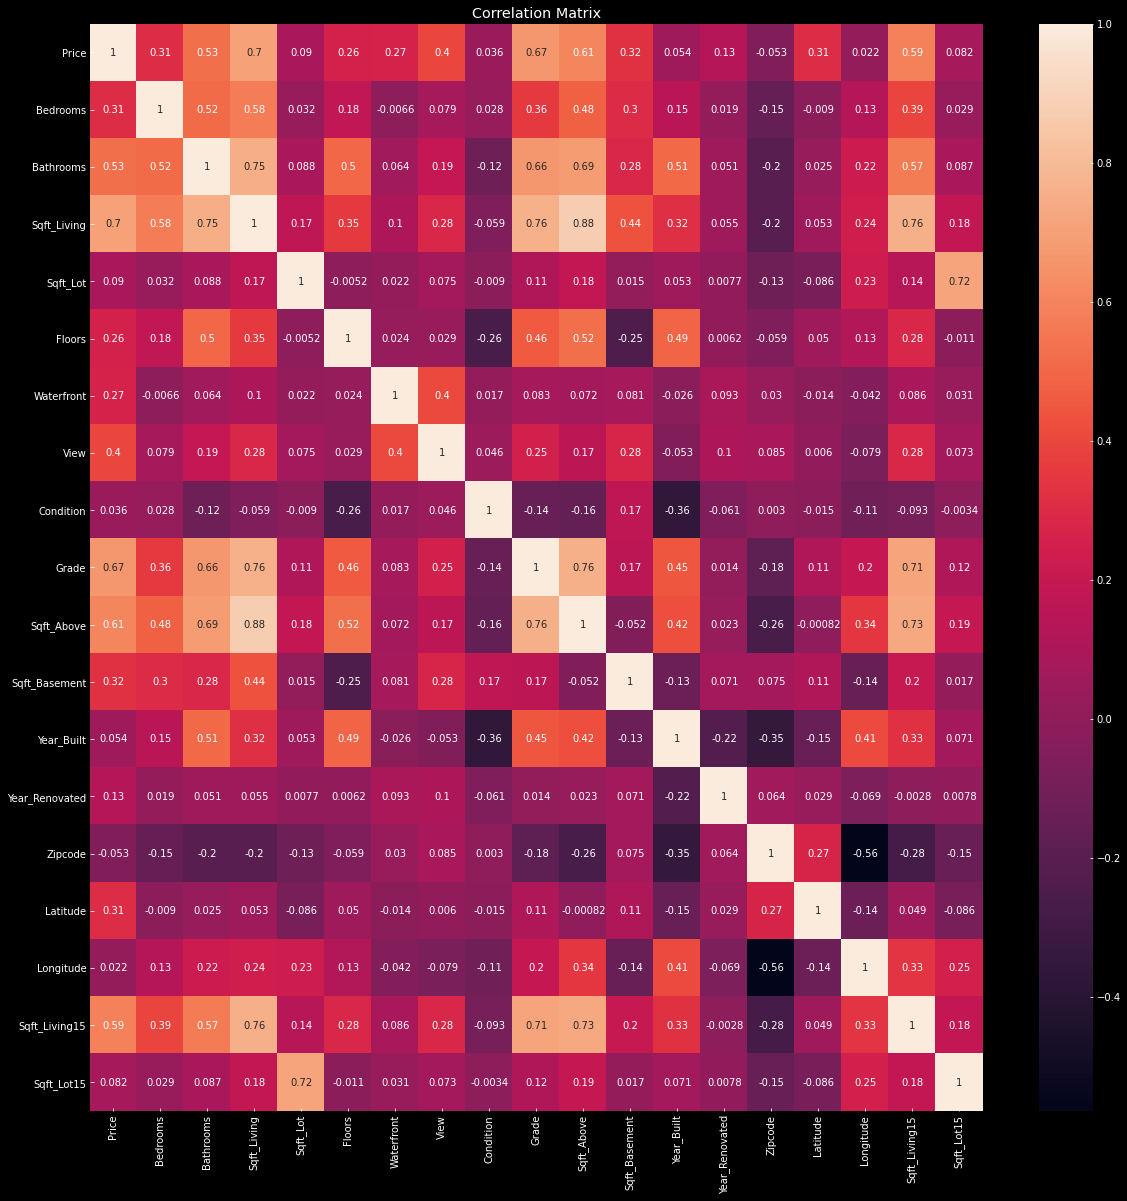

In [61]:

# Plotting the heat map to visualize correlation

plt.figure(figsize=(20,20))
sns.heatmap(house_df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

### III. Multivariate Analysis

## 5. Regression Modelling

> Checking for Multicoliniarity


In [73]:
# Checking for multicolinearity

corr_house = house_df.corr()

corr_house

Price  Bedrooms  Bathrooms  ...   Zipcode  Latitude  Longitude
Price           1.000000  0.308346   0.525140  ... -0.053162  0.306922   0.021567
Bedrooms        0.308346  1.000000   0.515935  ... -0.152721 -0.008953   0.129474
Bathrooms       0.525140  0.515935   1.000000  ... -0.203831  0.024590   0.223047
Sqft_Living     0.702046  0.576674   0.754688  ... -0.199435  0.052521   0.240221
Sqft_Lot        0.089658  0.031699   0.087750  ... -0.129611 -0.085680   0.229552
Floors          0.256793  0.175448   0.500669  ... -0.059025  0.049593   0.125343
Waterfront      0.266332 -0.006583   0.063747  ...  0.030277 -0.014272  -0.041904
View            0.397466  0.079433   0.187891  ...  0.084838  0.006049  -0.078560
Condition       0.036397  0.028422  -0.124940  ...  0.002962 -0.014971  -0.106512
Grade           0.667478  0.357003   0.664990  ... -0.184795  0.114086   0.198347
Sqft_Above      0.605569  0.477619   0.685351  ... -0.261163 -0.000823   0.343791
Sqft_Basement   0.323849  0.303077   0.283814  ...  0.074781  0.110535  -0.144743
Year_Built      0.053980  0.154276   0.505997  ... -0.346808 -0.148099   0.409395
Year_Renovated  0.126503  0.018695   0.050879  ...  0.064388  0.029271  -0.068594
Zipcode        -0.053162 -0.152721  -0.203831  ...  1.000000  0.267064  -0.564069
Latitude        0.306922 -0.008953   0.024590  ...  0.267064  1.000000  -0.135545
Longitude       0.021567  0.129474   0.223047  ... -0.564069 -0.135545   1.000000

[17 rows x 17 columns]

In [74]:
# Calculating the VIF

vif_house = pd.DataFrame(np.linalg.inv(corr_house.values), index=corr_house.index, columns=corr_house.columns)

vif_house

Price  Bedrooms  Bathrooms  ...   Zipcode  Latitude  Longitude
Price           3.321385  0.298308  -0.285073  ...  0.291615 -0.760954   0.264750
Bedrooms        0.298308  1.675226  -0.490869  ...  0.104850 -0.018027   0.051477
Bathrooms      -0.285073 -0.490869   3.370211  ...  0.010501  0.026005   0.048182
Sqft_Living    -0.822250 -0.675920  -3.033546  ... -0.349396  0.100383   0.022545
Sqft_Lot        0.019896  0.108683   0.020548  ... -0.016917  0.076262  -0.231982
Floors         -0.024277  0.041939  -0.684720  ... -0.191922 -0.114576   0.201726
Waterfront     -0.452589  0.022625   0.047835  ... -0.021063  0.115485  -0.003699
View           -0.381159  0.083818   0.001126  ... -0.151211  0.195933   0.001091
Condition      -0.151161 -0.063837  -0.125750  ...  0.142573  0.101158  -0.011961
Grade          -1.062581  0.217884  -0.149756  ...  0.054286 -0.116928   0.203322
Sqft_Above     -0.675426 -0.370198   1.639554  ...  0.222597  0.369942  -0.677541
Sqft_Basement  -0.222669 -0.207029   0.452836  ...  0.065741 -0.001536   0.024952
Year_Built      0.701084  0.198054  -0.997241  ...  0.312778  0.152738  -0.442883
Year_Renovated -0.067498  0.039626  -0.257072  ...  0.023820  0.065045  -0.049159
Zipcode         0.291615  0.104850   0.010501  ...  1.672890 -0.368130   0.781622
Latitude       -0.760954 -0.018027   0.026005  ... -0.368130  1.351469  -0.170055
Longitude       0.264750  0.051477   0.048182  ...  0.781622 -0.170055   1.790082

[17 rows x 17 columns]

> Since VIF for our variables is below 5, we note that our variables are good for the model.

> Feature Engineering

In [75]:
# Label encoding year renovated to get values that represent when renovation was done

from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()

house_df['Year_Renovated']= en.fit_transform(house_df['Year_Renovated'])

house_df.head()

Price  Bedrooms  Bathrooms  ...  Zipcode  Latitude  Longitude
0  221900.0         3       1.00  ...    98178   47.5112   -122.257
1  538000.0         3       2.25  ...    98125   47.7210   -122.319
2  180000.0         2       1.00  ...    98028   47.7379   -122.233
3  604000.0         4       3.00  ...    98136   47.5208   -122.393
4  510000.0         3       2.00  ...    98074   47.6168   -122.045

[5 rows x 17 columns]

### I. Multiple Linear Regression

In [80]:
house_df.columns

Index(['Price', 'Bedrooms', 'Bathrooms', 'Sqft_Living', 'Sqft_Lot', 'Floors',
       'Waterfront', 'View', 'Condition', 'Grade', 'Sqft_Above',
       'Sqft_Basement', 'Year_Built', 'Year_Renovated', 'Zipcode', 'Latitude',
       'Longitude'],
      dtype='object')

In [0]:
# Assigning lables
# 

X = house_df[['Bedrooms', 'Bathrooms', 'Sqft_Living', 'Sqft_Lot', 'Floors',
       'Waterfront', 'View', 'Condition', 'Grade', 'Year_Built',
        'Year_Renovated', 'Zipcode', 'Latitude','Longitude']]


y = house_df['Price']

In [0]:
# Dividing our dataset into train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [161]:
# Training our model

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
# Making Predictions

y_pred = regressor.predict(X_test)

# To compare the  output value with actual


predicted_price = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

predicted_price

Actual      Predicted
20188  602000.0  482908.740892
7573   320000.0  350694.535913
12873  245000.0  248468.527942
209    464000.0  679583.664348
19155  190000.0  183324.201703
...         ...            ...
11080  368888.0  500337.179205
18910  734200.0  798220.224458
15838  411000.0  667313.442893
8695   410000.0  506739.375171
20456  319000.0  341689.622694

[4322 rows x 2 columns]

In [163]:
# Evaluating the model

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 125837.03232119318
Mean Squared Error: 44131872180.655846
Root Mean Squared Error: 210075.87243816422


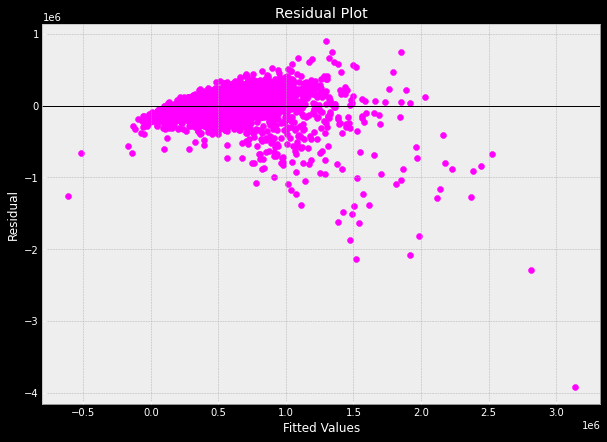

In [164]:
# ploting the residuals

residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
plt.figure(figsize=(10,7))
plt.scatter(y_pred, residuals, color='magenta')
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Fitted Values')
plt.axhline(y = float(residuals.mean()), color='black', linewidth=1)
plt.show()

In [165]:
# Doing Bartlett test for heterosckedasticity

import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom) # Calculating the critical value



if (test_result > critical_value):
  print('The variances are unequal, and the model should be re-evaluated')
else:
  print('The variances are homogeneous!')

The variances are homogeneous!


In [166]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.7019823102377768

### II. Quantile Regression

> Quantile regression is used when the data has outliers and is skwed. This model is ideal for our data set which has some outliers and has the price variable that is skewed to the right. 

> Another condition for using Quantile regression is that the depedent variable must be continous, does not have zero values and does not have a lot of repeated values.

In [0]:
# Determing our dependent and independent variables 

X = house_df[['Bedrooms', 'Bathrooms', 'Sqft_Living', 'Sqft_Lot', 'Floors',
       'Waterfront', 'View', 'Condition', 'Grade', 'Year_Built',
        'Year_Renovated', 'Zipcode', 'Latitude','Longitude']]


y = house_df['Price']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [112]:
import statsmodels.formula.api as smf

model = smf.quantreg('y ~ X', house_df)

res = model.fit(q=0.75)

print(res.summary())




                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.5145
Model:                       QuantReg   Bandwidth:                   1.882e+04
Method:                 Least Squares   Sparsity:                    3.791e+05
Date:                Sun, 07 Jun 2020   No. Observations:                21610
Time:                        17:00:43   Df Residuals:                    21595
                                        Df Model:                           14
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -122.5031      2.343    -52.278      0.000    -127.096    -117.910
X[0]       -2.948e+04   1696.115    -17.381      0.000   -3.28e+04   -2.62e+04
X[1]         2.44e+04   2677.246      9.114      0.000    1.92e+04    2.96e+04
X[2]         161.8078      2.651     61.038      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


### III. Ridge Regression 

In [0]:

# Importing the libraries that we will be using

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
# Determing our dependent and independent variables 

X = house_df[['Bedrooms', 'Bathrooms', 'Sqft_Living', 'Sqft_Lot', 'Floors',
       'Waterfront', 'View', 'Condition', 'Grade', 'Year_Built',
        'Year_Renovated', 'Zipcode', 'Latitude','Longitude']]


y = house_df['Price']

In [0]:
# Splitting data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [0]:
# determining the most appropriate value for the l2 regularization.
 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [154]:
# We fit our model and then get the best_params_

search.fit(X_train,y_train)
search.best_params_

{'alpha': 0.001}

In [155]:
# Getting the best score

search.best_score_

-42666283679.6501

In [156]:
# confirming by fitting the model with the information and finding the MSE

ridge = Ridge(normalize=True,alpha=0.001)

ridge.fit(X_train,y_train)
second_model = (mean_squared_error(y_true=y_test,y_pred=ridge.predict(X_test)))
print(second_model)

37107389251.75947


In [157]:
# Making predictions using ridge regression

y_pred = ridge.predict(X_test)
y_pred

predicted_ridge = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

predicted_ridge.head()

Actual      Predicted
20371  745000.0  865805.805493
8524   320000.0  382768.460198
15420  336750.0  443396.868852
14214  350000.0  517904.190821
16420  352750.0  208957.282685

In [158]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.6995655678872315

### IV. Lasso Regression

In [0]:
# Determing our dependent and independent variables 

X = house_df[['Bedrooms', 'Bathrooms', 'Sqft_Living', 'Sqft_Lot', 'Floors',
       'Waterfront', 'View', 'Condition', 'Grade', 'Year_Built',
        'Year_Renovated', 'Zipcode', 'Latitude','Longitude']]


y = house_df['Price']

In [0]:
# Scaling data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [144]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
import warnings


warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.7026215725999678
linear score: 0.7026296800927937
lasso MSE: 40441089966.4196
linear MSE: 40439987412.177055
lasso best estimator coef: [-33288.66828621  25916.61629094 166112.32335124  -1359.55368141
   9471.33058122  45850.40068937  41956.36319914  15607.86611805
 119399.97137832 -75771.11123466   8890.37736149 -32888.58211255
  83779.18921746 -26163.99256768]
linear coef: [-33354.09848729  25949.12629928 166150.14064883  -1386.17102539
   9506.97941828  45861.07756859  41962.73289604  15626.87629542
 119400.36662075 -75824.47705812   8902.4219722  -32957.8836636
  83800.31858314 -26204.56697158]


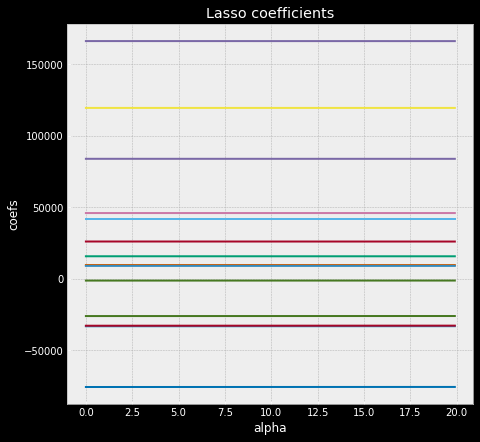

In [145]:
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

In [0]:
# Using Lasso regression to predict

y_pred = gridlasso.predict(X_test)

In [149]:
predicted_lasso = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

predicted_lasso.head()

Actual      Predicted
21202  450800.0  623161.434935
8457   350000.0  376550.456088
1611   378000.0  246683.110116
9736   292000.0  321273.406226
11752  302500.0  373631.129896

In [148]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.7026215725999678

### V. Elastic Net Regression

In [0]:
# Determing our dependent and independent variables 

X = house_df[['Bedrooms', 'Bathrooms', 'Sqft_Living', 'Sqft_Lot', 'Floors',
       'Waterfront', 'View', 'Condition', 'Grade', 'Year_Built',
        'Year_Renovated', 'Zipcode', 'Latitude','Longitude']]


y = house_df['Price']

In [0]:
# Elastic Net Model
# Creating the grid

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [0]:
# Splitting data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [134]:
# Fitting the model to display the best parameters

search.fit(X_train,y_train)
print(search.best_params_)
print(abs(search.best_score_))

{'alpha': 0.001}
41078775396.377846


In [138]:
# The best hyperparameters are alpha = 0.001 

from sklearn.linear_model import ElasticNet

elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)

elastic.fit(X_train,y_train)
second_model=(mean_squared_error(y_true=y_test,y_pred=elastic.predict(X_test)))
print(second_model)

82287384707.10233


In [139]:
# predicting the price and comparing to the actual

y_pred=elastic.predict(X_test)

y_pred

predicted_elastic = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

predicted_elastic.head()

Actual      Predicted
21202  450800.0  624818.894629
8457   350000.0  425897.885572
1611   378000.0  486053.580164
9736   292000.0  435007.083570
11752  302500.0  529822.336615

In [141]:
# Determning accuracy of the model usng R2 score

from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.3949101500632475

## Conclusion

> Lasso regression and multiple linear regression have the highest accuracy which means that they are the most ideal for determining the prices of houses based on the given independent variables. 